In [ ]:
!conda install -c intel scikit-learn

# Training a sentiment analysis classifier based on supervised machine learning algorithms

In [1]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [5]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/11_E2ngsEOyTQwbwVVRHY5urzFF95BQCV/edit#gid=1788161364
tweets_df = pd.read_csv('./data/tweets_escenario1.2.csv', sep = ',')

In [6]:
tweets_df.shape

(627, 3)

In [7]:
tweets_df.head()

,full_text,sentiment,emotion
0,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\nUribe Velez Alvarito no los deja dormir\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir 😂 https://t.co/k56Dv7id1J,negative,joy
4,"#OtraPregunta \n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\nEsto no pinta nada bien... y si además gana Lula en Brasil...\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [8]:
tweets_df.sample(n=100, random_state=1)

,full_text,sentiment,emotion
301,"Se sabía. No van a dejar ganar legalmente al próximo presidente @FicoGutierrez , le van a robar las elecciones. Ya perdimos, se tomaron el poder definitivamente. \n\n#ElRiesgoEs #QuienRespondePor #Colombia #ColombiaDecide #RCN #PetroCorrupto @Salu_Macallan8 @ArgiroCasta888 https://t.co/T9obCGmyk9",negative,fear
135,"#ColombiaMiElección Bajo el lema: “¡Liberemos a Colombia de las maquinarias y la corrupción!”, la aspirante a la presidencia, Ingrid Betancourt, presentó las líneas estratégicas del plan de gobierno.\n\nhttps://t.co/j8H8rcwrmW",neutral,anger
581,@MonederoJC A @petrogustavo lo quieren asesinar porque será el ganador de las elecciones presidenciales en Colombia.,negative,anger
592,"#presidente duque y congresistas q aprobaron tumbar ley garantías🇨🇴durante elecciones, deben renunciar Ya! @PGN_COL @FiscaliaCol @DefensoriaCol @CGR_Colombia ojo cuanto dinero se va perder erario público,se robaron para politiquería....justicia ya, q renuncien ya! https://t.co/O7Y6YrxYVI",negative,anger
132,"@MartinSantosR Un día un traidor, se robó un plebiscito, ilegalmente implementó un FARCACUERDO el congreso lo avaló cómplice del robo pues sus representados dijeron No. Como pueblo dormido no protestamos de forma contundente, por eso hoy se quieren robar las Elecciones. Colombia libre de Petro",negative,anger
...,...,...,...
499,@NanoC40 @juliomario55555 @CARLOSFMEJIA @infopresidencia @FiscaliaCol @PGN_COL @CNE_COLOMBIA Oigan a esteeee!!! En esas elecciones no hubo uno solo...,negative,sadness
441,"#VIDEO Rodolfo Hernández: ""Fajardo como que ya pasó a la historia"". https://t.co/pSC4N4Q5ZX https://t.co/3RaV9yqwaT",neutral,fear
347,@mindefensa @infopresidencia @PoliciaColombia @FuerzaAereaCol @IvanDuque @FuerzasMilCol @GobDeBolivar @GobCordoba_ @GobSucre si se van a reunir con sus amigos aliados del clan del golfo para mirar como da;an las elecciones para este 29 de mayo eso es lo único que hace este NARCOGOBIERNO FAVORECER A PARAMILITARES Y LAS MAFIAS EN COLOMBIA,negative,fear
17,"Que tristeza que @PGN_COL @FiscaliaCol @RamaJudicialCol @MinInterior NO puedan sacar a mag @CNE_COLOMBIA Alexander Vega @Registraduria y estén sometidos a un delincuente @petrogustavo, #Colombia merece explicación bodrio elecciones y candidato que se alia con mafias y narcos.",negative,sadness


In [9]:
df2 = tweets_df.sample(n=100).copy()
len(df2)

100

In [10]:
df2.to_csv('DatasetPrueba1.csv')

In [11]:
df2['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.66
neutral     0.26
positive    0.08
Name: sentiment, dtype: float64

In [12]:
df2['emotion'].value_counts(dropna = False, normalize = True)

anger      0.40
fear       0.25
joy        0.21
sadness    0.14
Name: emotion, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [13]:
# Removing  unlabeled tweets
tweets_labeled_df = df2.loc[df2['sentiment'].notnull()]

In [14]:
tweets_labeled_df.shape

(100, 3)

In [15]:
tweets_unlabeled_df = df2.loc[df2['sentiment'].isnull()]

In [16]:
tweets_unlabeled_df.shape

(0, 3)

In [17]:
# Scenario 1: Working with all classes

# Scenario 2: Working only with positive and negative classes
# Removing neutral class
#tweets_labeled_df = tweets_labeled_df.loc[tweets_labeled_df['sentiment'].isin(['positive', 'negative'])]

# Scenario 3: Treating neutral as positive classes
tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment'].replace({'neutral': 'positive'})

### Splitting train and test datasets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)


In [19]:
X_train.shape

(80,)

In [20]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.6625
positive    0.3375
Name: sentiment, dtype: float64

In [21]:
X_test.shape

(20,)

In [22]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.65
positive    0.35
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="./imgs/bow.png" style="width: 500px;">
            </td>
            <td>
                <h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [23]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [24]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [25]:
X_bow = bow.fit_transform(X_train)

In [26]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [27]:
model = RandomForestClassifier()

In [28]:
model.fit(X_bow, y_train)

RandomForestClassifier()

In [29]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

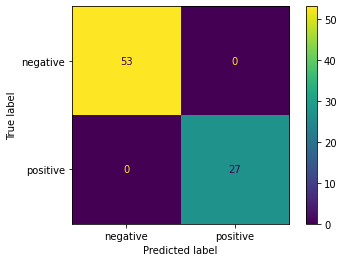

In [30]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

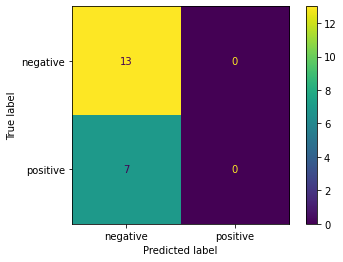

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [32]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'negative'))
print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'negative'))
print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'negative'))

Precision: 0.0
Recall: 0.0
F1: 0.0
Precision: 0.65
Recall: 1.0
F1: 0.787878787878788


C:\Users\Juan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Metrics calculation for more than two classes
#print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
#print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
#print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

### Training and evaluating a model using TF-IDF

In [34]:
model = RandomForestClassifier()

In [35]:
model.fit(X_tfidf, y_train)

RandomForestClassifier()

In [36]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

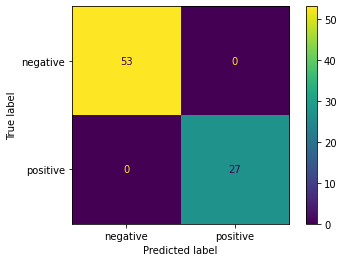

In [37]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

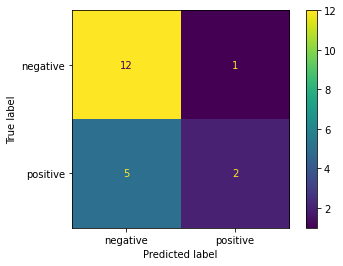

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [39]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))
print('Precision:', precision_score(y_test, y_test_tfidf_predict, pos_label = 'negative'))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, pos_label = 'negative'))
print('F1:', f1_score(y_test, y_test_tfidf_predict, pos_label = 'negative'))

Precision: 0.6666666666666666
Recall: 0.2857142857142857
F1: 0.4
Precision: 0.7058823529411765
Recall: 0.9230769230769231
F1: 0.8000000000000002


In [ ]:
# Metrics calculation for more than two classes
#print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
#print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
#print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

### How interpret the results?

<table>
    <tbody>
        <tr>
            <td>
                <img src="./imgs/confusion-matrix.png" style="height: 400px;">
            </td>
            <td>
                <img src="./imgs/precision-recall.png" style="height: 600px;">
            </td>
        </tr>
    </tbody>
</table>

### Analyzing errors

In [ ]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [ ]:
error_df.shape

In [ ]:
error_df.loc[error_df['actual'] != error_df['predicted']].head(100)